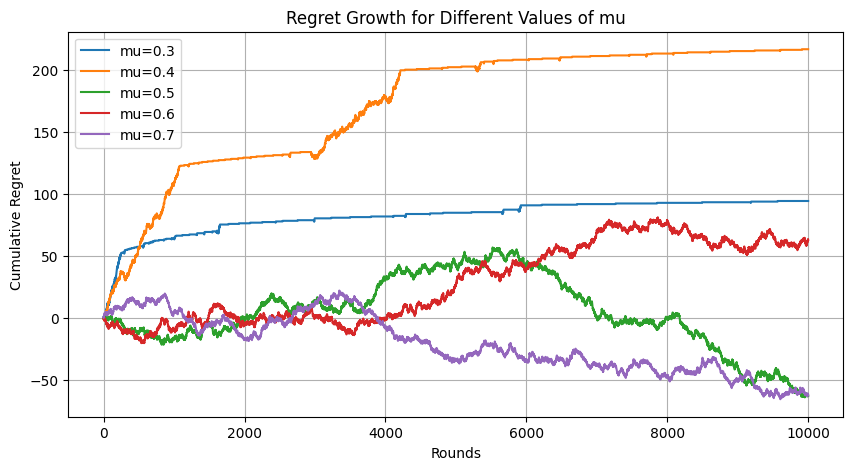

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def run_experiment(mu, T=10000, N0=10):
    """
    Simulates the decision process for T rounds.
    :param mu: True probability of success for the new product.
    :param T: Number of time steps.
    :param N0: Initial exploration phase for the new product.
    """
    # Counters
    S_new = 0  # Success count for the new product
    N_new = 0  # Times the new product was selected
    regrets = []
    
    for t in range(1, T + 1):
        if N_new < N0:
            # Forced exploration phase
            choice = "new"
        else:
            # Compute estimated success probability
            hat_mu = S_new / N_new if N_new > 0 else 0
            ucb_new = hat_mu + np.sqrt((2 * np.log(t)) / N_new) if N_new > 0 else 1.0
            
            # Compare with known probability of established product (0.5)
            choice = "new" if ucb_new >= 0.5 else "old"
        
        # Simulate sale
        if choice == "new":
            success = np.random.rand() < mu
            S_new += success
            N_new += 1
        else:
            success = np.random.rand() < 0.5
        
        # Compute regret
        best_prob = max(0.5, mu)
        regret = best_prob - (success if choice == "new" else 0.5)
        regrets.append(regret)
    
    return np.cumsum(regrets)  # Return cumulative regret

# Simulating different values of mu
T = 10000
mu_values = [0.3, 0.4, 0.5, 0.6, 0.7]  # Various probabilities for the new product

plt.figure(figsize=(10, 5))
for mu in mu_values:
    regret = run_experiment(mu, T)
    plt.plot(regret, label=f"mu={mu}")

plt.xlabel("Rounds")
plt.ylabel("Cumulative Regret")
plt.title("Regret Growth for Different Values of mu")
plt.legend()
plt.grid()
plt.show()


In [4]:
import numpy as np

class FTL:
    def __init__(self, n_actions=2):
        self.n_actions = n_actions
        self.history = np.zeros(n_actions)  # Keeps track of cumulative losses for each action
        
    def predict(self):
        # FTL always selects the action with the least cumulative loss
        return np.argmin(self.history)
    
    def update(self, prediction, loss):
        # Update the loss for the chosen action
        self.history[prediction] += loss

class Hedge:
    def __init__(self, n_actions=2, T=2000, eta=None):
        self.n_actions = n_actions
        self.T = T
        self.eta = eta or (2 * np.log(T) / n_actions)
        self.weights = np.ones(n_actions)  # Initialize weights to 1
        
    def predict(self):
        # Normalize the weights to make them probabilities
        prob = self.weights / np.sum(self.weights)
        return np.random.choice(self.n_actions, p=prob)
    
    def update(self, action, loss):
        # Update weights with exponential update rule
        self.weights[action] *= np.exp(-self.eta * loss)


class AnytimeHedge:
    def __init__(self, n_actions=2, T=2000, use_tighter=False):
        self.n_actions = n_actions
        self.T = T
        self.use_tighter = use_tighter
        self.weights = np.ones(n_actions)  # Initialize weights to 1
        
    def predict(self, t):
        # Learning rate at time t
        eta_t = np.log(t) / self.n_actions if not self.use_tighter else (2 * np.log(t)) / self.n_actions
        # Normalize the weights to make them probabilities
        prob = self.weights / np.sum(self.weights)
        return np.random.choice(self.n_actions, p=prob)
    
    def update(self, action, loss, t):
        # Learning rate at time t
        eta_t = np.log(t) / self.n_actions if not self.use_tighter else (2 * np.log(t)) / self.n_actions
        # Update weights with exponential update rule
        self.weights[action] *= np.exp(-eta_t * loss)


In [ ]:
def adversarial_sequence(T):
    X = np.zeros(T)
    for t in range(1, T+1):
        # Alternating 0 and 1 to confuse FTL
        X[t-1] = 1 if t % 2 == 0 else 0
    return X
def compare_adversarial_regret(T):
    adversarial_X = adversarial_sequence(T)
    
    # Running similar simulations as above, but using the adversarial sequence
    # For FTL vs Hedge and Anytime Hedge
    pass


/tmp/ipykernel_5449/1799898963.py:29: RuntimeWarning: invalid value encountered in divide
  prob /= np.sum(prob)  # Ensure the probabilities sum to 1


NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detect

/tmp/ipykernel_5449/1799898963.py:55: RuntimeWarning: invalid value encountered in divide
  prob /= np.sum(prob)  # Ensure the probabilities sum to 1


NaN detected in probabilities at time 1068
NaN detected in probabilities at time 1069
NaN detected in probabilities at time 1070
NaN detected in probabilities at time 1071
NaN detected in probabilities at time 1072
NaN detected in probabilities at time 1073
NaN detected in probabilities at time 1074
NaN detected in probabilities at time 1075
NaN detected in probabilities at time 1076
NaN detected in probabilities at time 1077
NaN detected in probabilities at time 1078
NaN detected in probabilities at time 1079
NaN detected in probabilities at time 1080
NaN detected in probabilities at time 1081
NaN detected in probabilities at time 1082
NaN detected in probabilities at time 1083
NaN detected in probabilities at time 1084
NaN detected in probabilities at time 1085
NaN detected in probabilities at time 1086
NaN detected in probabilities at time 1087
NaN detected in probabilities at time 1088
NaN detected in probabilities at time 1089
NaN detected in probabilities at time 1090
NaN detecte

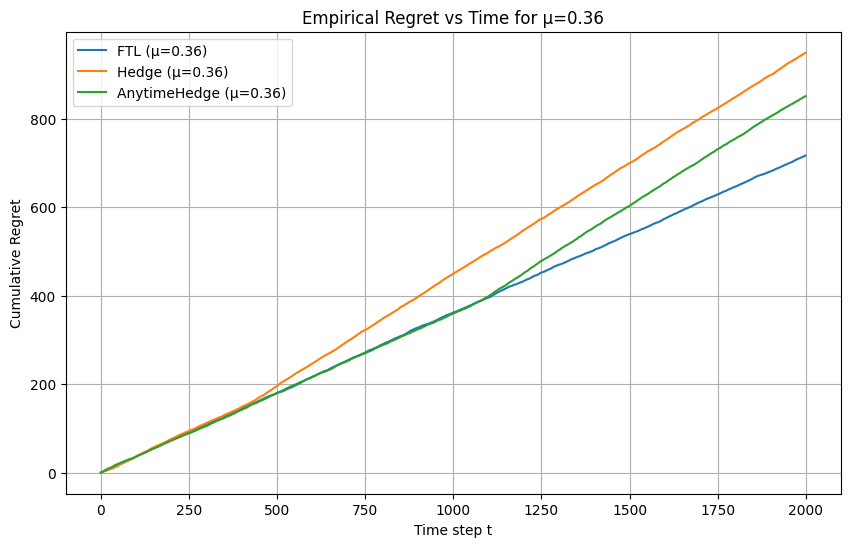

NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detect

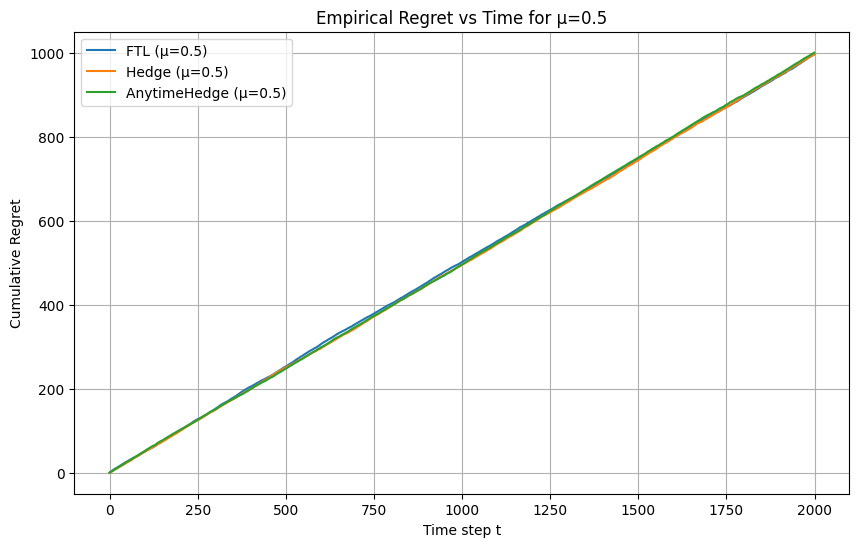

NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detected in probabilities
NaN detect

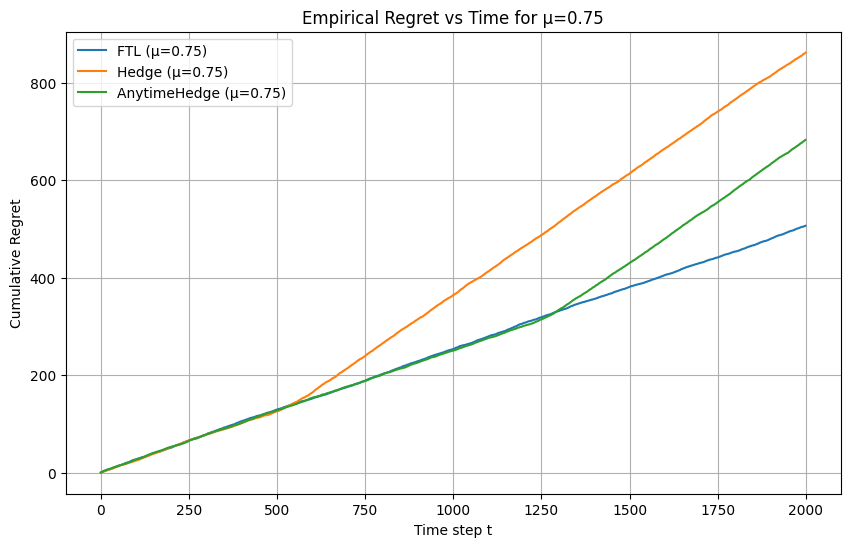

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define the FTL algorithm
class FTL:
    def __init__(self, n_actions=2):
        self.n_actions = n_actions
        self.history = np.zeros(n_actions)  # Keeps track of cumulative losses for each action
        
    def predict(self):
        # FTL always selects the action with the least cumulative loss
        return np.argmin(self.history)
    
    def update(self, prediction, loss):
        # Update the loss for the chosen action
        self.history[prediction] += loss

# Define the Hedge algorithm
class Hedge:
    def __init__(self, n_actions=2, T=2000, eta=None):
        self.n_actions = n_actions
        self.T = T
        self.eta = eta or (2 * np.log(T) / n_actions)  # Learning rate
        self.weights = np.ones(n_actions)  # Initialize weights to 1
        
    def predict(self):
        # Normalize the weights to make them probabilities, with small regularization to avoid division by zero
        prob = self.weights / (np.sum(self.weights) + 1e-10)  # Add small constant to avoid zero division
        prob /= np.sum(prob)  # Ensure the probabilities sum to 1
        
        # Check for NaN values
        if np.any(np.isnan(prob)):
            print("NaN detected in probabilities")
            prob = np.ones(self.n_actions) / self.n_actions  # Reset to uniform distribution
        
        return np.random.choice(self.n_actions, p=prob)
    
    def update(self, action, loss):
        # Update weights with exponential update rule
        self.weights[action] *= np.exp(-self.eta * loss)

# Define the Anytime Hedge algorithm
class AnytimeHedge:
    def __init__(self, n_actions=2, T=2000, use_tighter=False):
        self.n_actions = n_actions
        self.T = T
        self.use_tighter = use_tighter
        self.weights = np.ones(n_actions)  # Initialize weights to 1
        
    def predict(self, t):
        # Learning rate at time t
        eta_t = np.log(t) / self.n_actions if not self.use_tighter else (2 * np.log(t)) / self.n_actions
        # Normalize the weights to make them probabilities
        prob = self.weights / (np.sum(self.weights) + 1e-10)  # Add small constant to avoid zero division
        prob /= np.sum(prob)  # Ensure the probabilities sum to 1
        
        # Check for NaN values
        if np.any(np.isnan(prob)):
            print(f"NaN detected in probabilities at time {t}")
            prob = np.ones(self.n_actions) / self.n_actions  # Reset to uniform distribution
        
        return np.random.choice(self.n_actions, p=prob)
    
    def update(self, action, loss, t):
        # Learning rate at time t
        eta_t = np.log(t) / self.n_actions if not self.use_tighter else (2 * np.log(t)) / self.n_actions
        # Update weights with exponential update rule
        self.weights[action] *= np.exp(-eta_t * loss)

# Function to simulate regret
def simulate_regret(algorithm, T, mu, n_runs=10):
    regrets = np.zeros(T)
    
    # Run the simulation multiple times
    for run in range(n_runs):
        X = np.random.binomial(1, mu, T)  # Generate binary sequence Xi based on bias mu
        cumulative_regret = np.zeros(T)  # Initialize cumulative regret
        
        # Initialize the algorithm
        if isinstance(algorithm, AnytimeHedge):
            algo = algorithm(n_actions=2, T=T, use_tighter=False)
        else:
            algo = algorithm(n_actions=2)
        
        # Track the regret for each time step
        for t in range(1, T+1):
            prediction = algo.predict(t) if isinstance(algo, AnytimeHedge) else algo.predict()
            loss = 0 if prediction == X[t-1] else 1  # Calculate loss: 0 if correct, 1 if incorrect
            
            # Update the algorithm with prediction and loss
            if isinstance(algo, AnytimeHedge):
                algo.update(prediction, loss, t)
            else:
                algo.update(prediction, loss)
            
            # Regret calculation: best action is 0 if mu < 0.5 else 1
            best_action = 0 if mu < 0.5 else 1
            regret = 0 if prediction == best_action else 1
            
            cumulative_regret[t-1] = cumulative_regret[t-2] + regret if t > 1 else regret
        
        regrets += cumulative_regret  # Sum regrets over all runs
    
    return regrets / n_runs  # Average over the number of runs

# Parameters
T = 2000
mu_values = [0.36, 0.5, 0.75]  # Different values of µ for testing
algorithms = [FTL, Hedge, AnytimeHedge]

# Plotting the results for each µ
for mu in mu_values:
    plt.figure(figsize=(10, 6))
    for algo in algorithms:
        regrets = simulate_regret(algo, T, mu)  # Get the cumulative regret for each algorithm
        plt.plot(regrets, label=f'{algo.__name__} (µ={mu})')
    
    plt.xlabel('Time step t')
    plt.ylabel('Cumulative Regret')
    plt.title(f'Empirical Regret vs Time for µ={mu}')
    plt.legend()
    plt.grid(True)
    plt.show()
